In [6]:
import matplotlib.pyplot as plt
import pandas as pd 

from datetime import datetime
from matplotlib.pyplot import figure

In [7]:
def user_choice():
    while True:
        try:
            print("Please choose which data you want to \n")
            print("A/a for U.S data")
            print("B/b for state data")
            choice = input("Enter: ")
        except ValueError:
            print("Invalid choice") 
            continue
        if choice.lower() not in ('a', 'b'): 
            print("Invalid choice")
            continue
        if choice.lower() == 'q':
            return
        else:
            header = ['data', 'state', 'fips' ,'cases', 'death', 
            'confirmed_cases', 'confirmed_deaths', 'probable_cases', 'probable_deaths']
            
            if(choice.lower() == "a"):
                header = ['data', 'cases', 'deaths', 'confirmed_cases', 'confirmed_deaths', 'probable_cases', 'probable_deaths']
                return 'a'
            elif(choice.lower() == "b"):
                header = ['date', 'state', 'fips' ,'cases', 'deaths', 
            'confirmed_cases', 'confirmed_deaths', 'probable_cases', 'probable_deaths']
                return 'b'
            break; 

In [8]:
def read_file(choice):
    if(choice == 'a'):
        df = pd.read_csv("https://github.com/nytimes/covid-19-data/raw/master/live/us.csv")
    else:
        df = pd.read_csv("https://github.com/nytimes/covid-19-data/raw/master/live/us-states.csv")
    return df

In [9]:
#def visualization(data):
    
    


Please choose which data you want to 

A/a for U.S data
B/b for state data
Alabama
Please choose which state you want to see 



ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

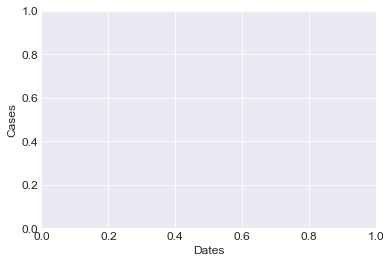

In [10]:
choice = user_choice()
data = read_file(choice)
data['date'] = data['date'].map(lambda x: datetime.strptime(str(x), '%Y-%m-%d'))
#list(data)
#data.head()

fig, ax = plt.subplots()
plt.style.use('seaborn-darkgrid')
plt.xlabel("Dates", fontsize = 12)
plt.ylabel("Cases", fontsize = 12)
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)

if(choice == 'a'): 
    plt.title("Daily death cases and total cases in United States 2020-2021", fontsize = 20)
else: 
    for index, row in data.iterrows():
        print(row['state'])
        while True:
            try:
                print("Please choose which state you want to see \n")
                choice = input("Enter: ")
            except ValueError:
                print("Invalid choice") 
                continue
            if choice == 'q':
                break
            if data.loc[data['state'] == choice]:
                plt.title(f"Daily death cases and total cases in {choice} 2020-2021", fontsize = 20)
            else:
                print('No data for state you choice')
                continue

ax.plot(data['date'], data['cases'], c = 'blue', label = 'Total cases', linewidth = 0.8, markersize = 5)
ax.plot(data['date'], data['deaths'], c = 'green', label = 'Total death cases', linewidth = 0.8, markersize = 5)

ax.legend()
plt.gcf().autofmt_xdate()
#figure(figsize = (10,8))
plt.show()
